In [1]:
!git clone https://github.com/dlbkv/Test-Task-W.AI

Cloning into 'Test-Task-W.AI'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 15 (delta 3), reused 6 (delta 1), pack-reused 0
Unpacking objects: 100% (15/15), 359.60 KiB | 1.30 MiB/s, done.


In [3]:
!pip install -q segmentation_models

In [12]:
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from PIL import Image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet import preprocess_input
from segmentation_models.losses import DiceLoss
from segmentation_models.metrics import FScore


In [23]:
folder_path = '/kaggle/input/airbus-ship-detection/test_v2'

In [29]:
#функція для обробки зображень

def preprocess_image(image_path, target_size=(768, 768), preprocessing_fn=None):
    image = load_img(image_path, target_size=target_size)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)  # додати розмір батчу
    if preprocessing_fn:
        images = preprocessing_fn(image)

    return image

In [19]:
# завантаження моделі та користувальницьких об'єктів

def dice_loss_from_config(config):
    return DiceLoss()

def fscore_from_config(config):
    return FScore()

custom_objects = {
    'DiceLoss': dice_loss_from_config,
    'FScore': fscore_from_config,
}
model = load_model('/kaggle/working/Test-Task-W.AI/saved_model.keras', custom_objects=custom_objects)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


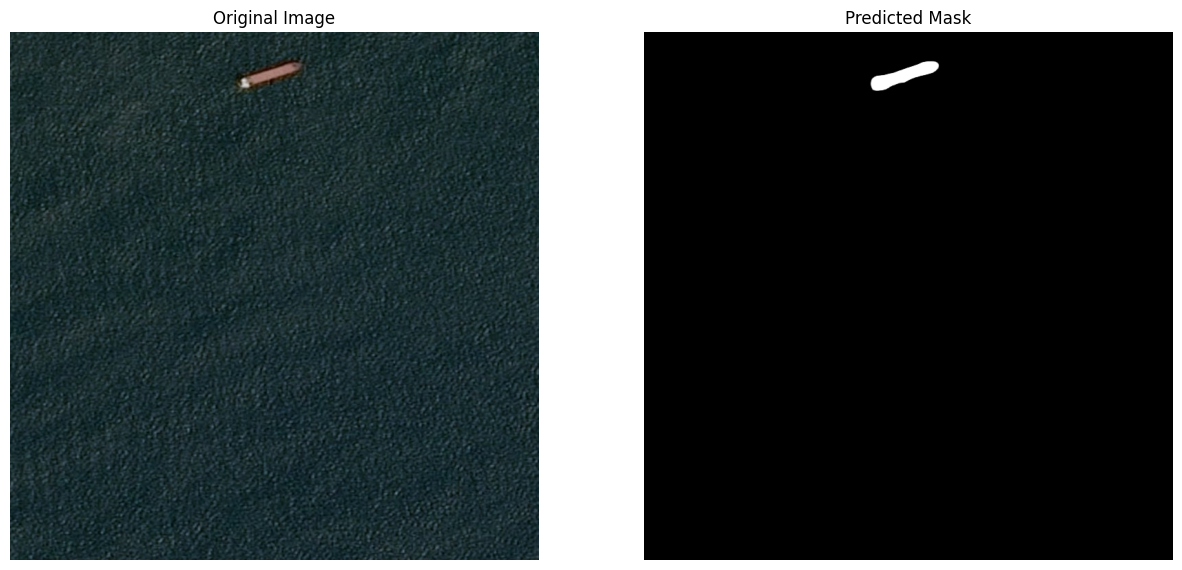

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


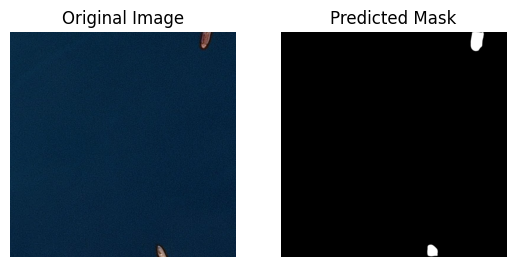

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


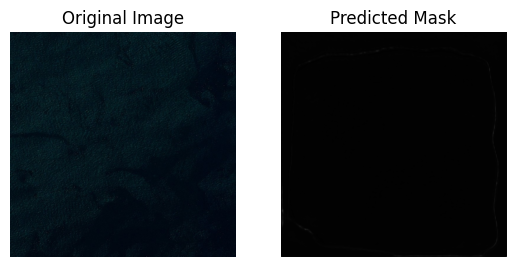

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


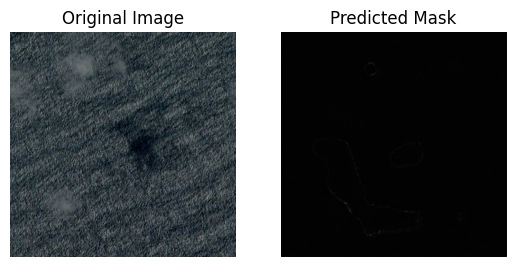

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


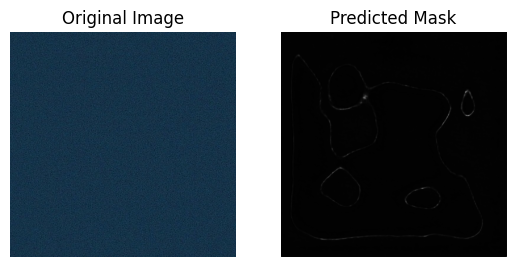

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


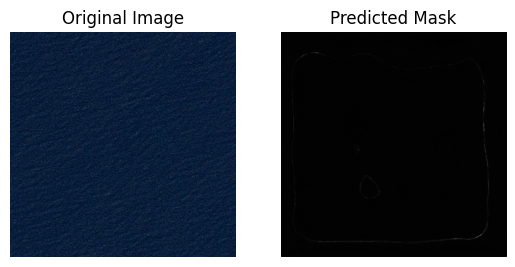

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


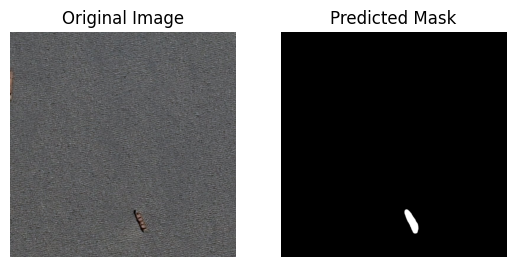

In [65]:
# завантаження зображень та виборка випадкових
image_files = os.listdir(folder_path)
random_image_files = random.sample(image_files, k=7)

plt.figure(figsize=(15, 10))

for i, image_file in enumerate(random_image_files, start=1):
    image_path = os.path.join(folder_path, image_file)
    
    # Предобробка зображення
    image = preprocess_image(image_path, target_size=(768, 768), preprocessing_fn=preprocess_input)
    
    # зображення для візуалізації
    image_to_viz = Image.open(image_path).convert("RGB")
    image_to_viz = np.array(image_to_viz)
    
    # передбачення моделі
    predictions = model.predict(image)
    
    # Візуалізація
    plt.subplot(1, 2, 1)
    plt.imshow(image_to_viz.astype(np.uint8))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(predictions.squeeze(), cmap='gray')
    plt.title('Predicted Mask')
    plt.axis('off')
    plt.show()
    